##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **MODEL TRAINING WITH THE OXFORD DATASET DATASET**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general neural network with some of the most important configurations. Test it with different data sets and track it's performance with differents hyperparameters

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_iiit_pet', with_info=True, as_supervised=True)
train_ds, test_ds = dataset['train'], dataset['test']

e:\Users\PERSONAL\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 1/2 [01:41<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:41<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:41<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:41<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:41<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:41<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:42<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:42<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:42<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:42<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:45<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:46<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:47<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/2 [01:47<00:21, 21.34s/ url]

Dl Completed...:  50%|█████     | 1/

Dataset oxford_iiit_pet downloaded and prepared to C:\Users\PERSONAL\tensorflow_datasets\oxford_iiit_pet\3.2.0. Subsequent calls will reuse this data.


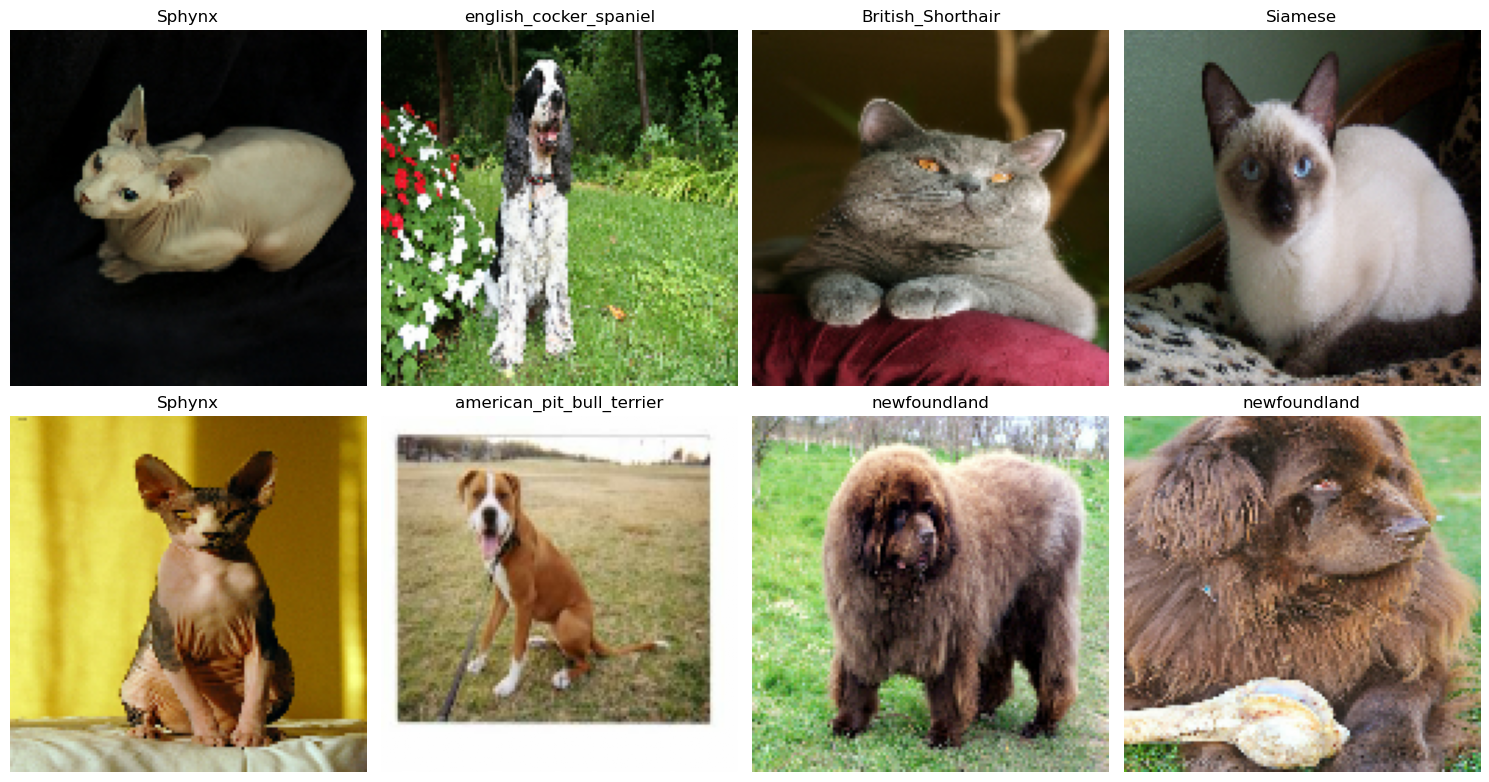

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

dataset, info = tfds.load('oxford_iiit_pet', with_info=True, as_supervised=True)
train_ds, test_ds = dataset['train'], dataset['test']

@tf.function(input_signature=[
    tf.TensorSpec(shape=[None, None, 3], dtype=tf.uint8),
    tf.TensorSpec(shape=[], dtype=tf.int64)
])
def resize_and_format(image, label):
    # Resize the image to a consistent shape.
    image = tf.image.resize(image, [128, 128])
    
    # Cast the image to float32 and scale pixel values to the [0, 1] range.
    image = tf.cast(image, tf.float32) / 255.0
    
    return image, label

# Apply the preprocessing function and then batch
train_ds = train_ds.map(resize_and_format)
train_ds = train_ds.batch(8)

for images, labels in train_ds.take(1):
    fig, axs = plt.subplots(2, 4, figsize=(15, 8))
    axs = axs.flatten()

    for i in range(8):
        image = images[i].numpy()
        label = labels[i].numpy()

        axs[i].imshow(image)
        class_name = info.features['label'].int2str(label)

        axs[i].set_title(class_name)
        axs[i].axis('off')

plt.tight_layout()
plt.show()

In this part the model will be train with Xception-like architecture but using convolutional layers to compare with the Separable convolutions

In [23]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(128,128,3))

x= layers.Rescaling(1/255)(inputs)
x= layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128]:
    residual = x
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(size, 3, padding='same', use_bias=False)(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(size, 3, padding='same', use_bias=False)(x)
    
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = layers.Conv2D(
        size, 1, strides=2, padding='same', use_bias=False) (residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#### <font color=#A0A0A0> **🔘 Selection of hyperparameters**</font>

#### <font color=#A0A0A0> **🧪 Testing the network with another data set**</font>

#### <font color=#A0A0A0> **🧐 Performance Summary**</font>

#### <font color=#A0A0A0> **🧐✅ Conclusions**</font>